In [1]:
import tensorflow as tf

if int(tf.__version__[0]) < 2:
  !pip install --upgrade tensorflow

     |████████████████████████████████| 421.8MB 39kB/s 
     |████████████████████████████████| 450kB 66.7MB/s 
     |████████████████████████████████| 3.9MB 64.0MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [0]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [0]:
(x_train,y_train), (x_test, y_test) = mnist.load_data()
(x_train, x_test) = (x_train.reshape(60000, 784)/ 255.0, x_test.reshape(10000, 784)/ 255.0) 

In [0]:
assert x_train.shape == (60000, 784)
assert x_test.shape == (10000, 784)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (InputLayer)     [(None, 784)]             0         
_________________________________________________________________
Encoding_Layer (Dense)       (None, 32)                25120     
_________________________________________________________________
Decoding_Layer (Dense)       (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


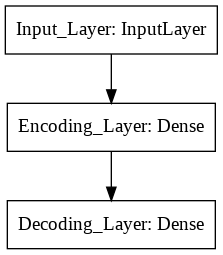

In [8]:
Inp = Input(shape = (784,), name = "Input_Layer")
x = Dense(32, activation = 'relu', name = 'Encoding_Layer', activity_regularizer='l1')(Inp)
Out = Dense(784, activation = 'sigmoid', name = 'Decoding_Layer')(x)

model = Model(Inp, Out)
model.summary()
plot_model(model)

In [9]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy')
History = model.fit(x_train,
                    x_train,
                    batch_size = 64,
                    epochs = 20,
                    verbose = 1)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 58us/sample - loss: 0.5622
Epoch 2/20
60000/60000 [==============================] - 3s 52us/sample - loss: 0.4082
Epoch 3/20
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3399
Epoch 4/20
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3063
Epoch 5/20
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2885
Epoch 6/20
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2784
Epoch 7/20
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2724
Epoch 8/20
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2688
Epoch 9/20
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2666
Epoch 10/20
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2652
Epoch 11/20
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2643
Epoch 1

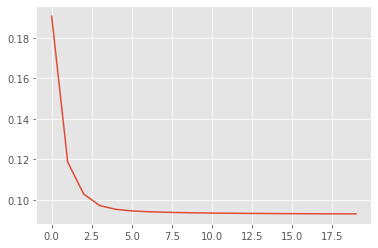

In [6]:
plt.style.use('ggplot')
plt.plot(History.epoch, History.history['loss'])

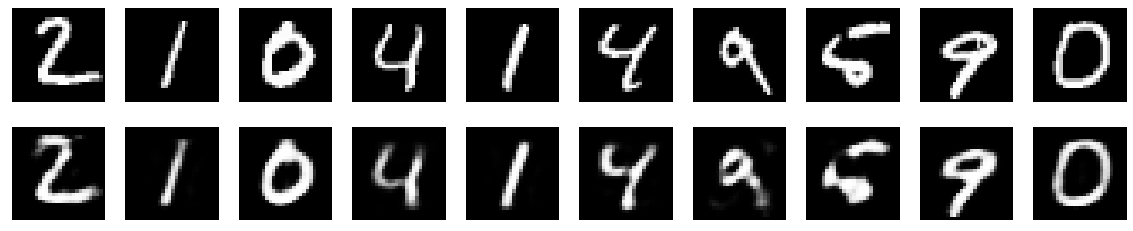

In [7]:
# From https://blog.keras.io/building-autoencoders-in-keras.html
decoded_imgs = model.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n+1):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()